In [16]:
# This notebook provides examples on how to use the EnsembleTreeExplainer and EnsembleTreeExplainerTransformer in python

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from transparency.python.explainer.ensemble_tree import EnsembleTreeExplainer, EnsembleTreeExplainerTransformer
from xgboost import XGBRegressor
from matplotlib import pyplot as plt

0.4841562638666268
[('age', 9.70664383561644), ('sex', 0.9811643835616443), ('bmi', 1.4329452054794523), ('map', 10.61664383561644), ('tc', 0.8895205479452043), ('ldl', -2.906164383561644), ('hdl', 3.1426712328767117), ('tch', -3.6617808219178074), ('ltg', -0.6608219178082195), ('glu', 7.268972602739726)]


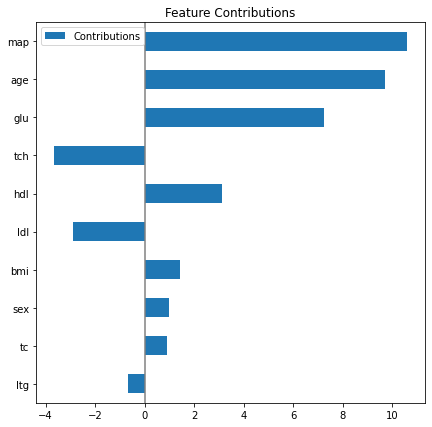

In [17]:
# EnsembleTreeExplainer Example

# loading the diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()
diabetes = load_diabetes()
X = np.array(pd.DataFrame(diabetes.data, columns=columns))
y = diabetes.target

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# model training
rf_model = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# regression evaluation: r2 score
r2_eval = r2(y_test, y_pred)
print(r2_eval)

# prediction explanation generation
expl = EnsembleTreeExplainer(rf_model)
contributions, contrib_intercept = expl.predict(X_test)
assert(((np.sum(contributions, axis=1) + contrib_intercept) - y_pred < .01).all())

average_contribs = list(zip(columns, np.mean(contributions, axis=0)))
print(average_contribs)

# Plotting mean feature contributions over the total population
plot_contrib_df = pd.DataFrame(np.mean(contributions, axis=0), index=columns, columns=['Contributions'])
final_plot_contrib_df = plot_contrib_df.iloc[plot_contrib_df['Contributions'].abs().argsort()]
final_plot_contrib_df.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Contributions')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

In [18]:
# XGBOOST EnsembleTreeExplainer Example

# loading the diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()
diabetes = load_diabetes()
X = np.array(pd.DataFrame(diabetes.data, columns=columns))
y = diabetes.target

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# model training
xgb_model = XGBRegressor().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# regression evaluation: r2 score
r2_eval = r2(y_test, y_pred)
print(r2_eval)

# prediction explanation generation
expl = EnsembleTreeExplainer(xgb_model)
contributions, contrib_intercept = expl.predict(X_test)
assert(((np.sum(contributions, axis=1) + contrib_intercept) - y_pred < .01).all())

average_contribs = zip(columns, np.mean(contributions, axis=0))
print(list(average_contribs))

0.17638975011538105
[('age', 3.7897906), ('sex', -5.3790174), ('bmi', -7.238046), ('map', -15.854238), ('tc', 5.4998665), ('ldl', -15.836064), ('hdl', 8.128694), ('tch', 16.641502), ('ltg', 8.113092), ('glu', 0.58664274)]


0.3692340129378928


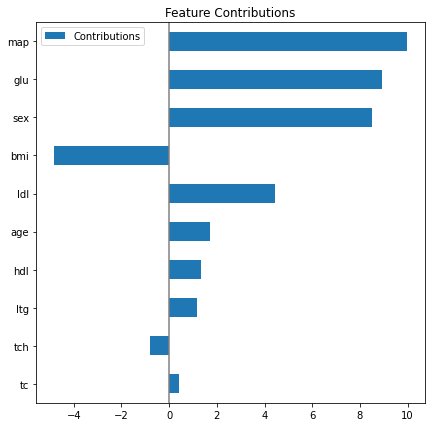

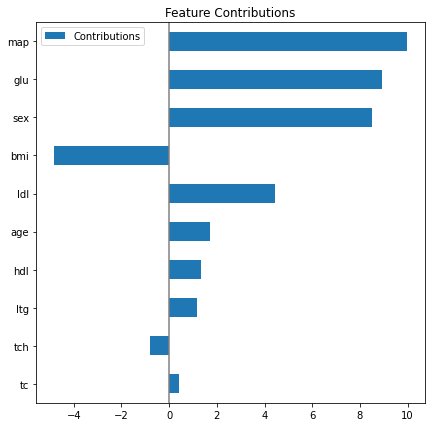

In [19]:
# Explanation Using the Ensemble Tree Explanation Transformer

columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# model training
rf_model = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# regression evaluation: r2 score
r2_eval = r2(y_test, y_pred)
print(r2_eval)

X_test2 = X_test.copy()

expl = EnsembleTreeExplainerTransformer(rf_model)
expl.fit()
X_test2 = expl.transform(X_test2)

assert('feature_contributions' in X_test2.columns)
assert('intercept_contribution' in X_test2.columns)
assert((np.abs(np.array(X_test2['feature_contributions'].apply(lambda x: sum(x[0])) + \
                        X_test2['intercept_contribution']) - np.array(y_pred)) < .01).all())

# Plotting mean feature contributions over the total population
plot_contrib_df = pd.DataFrame(np.mean(np.array(X_test2['feature_contributions'].\
                                apply(lambda x: x[0])), axis=0), index=X_test.columns, columns=['Contributions'])
final_plot_contrib_df = plot_contrib_df.iloc[plot_contrib_df['Contributions'].abs().argsort()]
final_plot_contrib_df.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Contributions')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

# Plotting mean feature contributions over the total population
plot_contrib_df = pd.DataFrame(np.mean(np.array(X_test2['feature_contributions'].\
                                apply(lambda x: x[0])), axis=0), index=X_test.columns, columns=['Contributions'])
final_plot_contrib_df = plot_contrib_df.iloc[plot_contrib_df['Contributions'].abs().argsort()]
final_plot_contrib_df.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Contributions')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()
